In [1]:
# Thư viện xử lý dữ liệu
import pandas as pd
import numpy as np

# Thư viện trực quan hóa
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 

# Thư viện cho Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Thư viện xử lý thời gian
import datetime as dt

# Cài đặt để biểu đồ hiển thị đẹp hơn
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('./data/online_retail.csv')

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
df_cleaned = df.dropna(subset=['Customer ID'])

In [6]:
df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]

In [7]:
df_cleaned = df_cleaned[df_cleaned['Price'] > 0]

In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      805549 non-null  object 
 1   StockCode    805549 non-null  object 
 2   Description  805549 non-null  object 
 3   Quantity     805549 non-null  int64  
 4   InvoiceDate  805549 non-null  object 
 5   Price        805549 non-null  float64
 6   Customer ID  805549 non-null  float64
 7   Country      805549 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 55.3+ MB


In [9]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

In [10]:
df_cleaned['Customer ID'] = df_cleaned['Customer ID'].astype(int).astype(str)

In [11]:
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['Price']

In [12]:
df_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


In [13]:
snapshot_date = df_cleaned['InvoiceDate'].max() + dt.timedelta(days=1)

In [14]:
print(f"Ngày 'hôm nay' (Snapshot Date) được chọn là: {snapshot_date.date()}")

Ngày 'hôm nay' (Snapshot Date) được chọn là: 2011-12-10


In [15]:
rfm_df = df_cleaned.groupby('Customer ID').agg(
    Recency=('InvoiceDate', lambda x: (snapshot_date - x.max()).days),
    Frequency=('Invoice', 'nunique'),
    Monetary=('TotalPrice', 'sum')
)

In [16]:
rfm_df

,Recency,Frequency,Monetary
Customer ID,,,
12346,326,12,77556.46
12347,2,8,5633.32
12348,75,5,2019.40
12349,19,4,4428.69
12350,310,1,334.40
...,...,...,...
18283,4,22,2736.65
18284,432,1,461.68
18285,661,1,427.00


In [17]:
rfm_df.rename(columns={
    'Recency': 'Recency (Số ngày từ lần mua cuối)',
    'Frequency': 'Frequency (Tổng số lần mua)',
    'Monetary': 'Monetary (Tổng giá trị chi tiêu)'
}, inplace=True)

In [18]:
rfm_df

,Recency (Số ngày từ lần mua cuối),Frequency (Tổng số lần mua),Monetary (Tổng giá trị chi tiêu)
Customer ID,,,
12346,326,12,77556.46
12347,2,8,5633.32
12348,75,5,2019.40
12349,19,4,4428.69
12350,310,1,334.40
...,...,...,...
18283,4,22,2736.65
18284,432,1,461.68
18285,661,1,427.00


In [19]:
print(rfm_df.describe())

       Recency (Số ngày từ lần mua cuối)  Frequency (Tổng số lần mua)  \
count                        5878.000000                  5878.000000   
mean                          201.331916                     6.289384   
std                           209.338707                    13.009406   
min                             1.000000                     1.000000   
25%                            26.000000                     1.000000   
50%                            96.000000                     3.000000   
75%                           380.000000                     7.000000   
max                           739.000000                   398.000000   

       Monetary (Tổng giá trị chi tiêu)  
count                       5878.000000  
mean                        3018.616737  
std                        14737.731040  
min                            2.950000  
25%                          348.762500  
50%                          898.915000  
75%                         2307.090000  
max   

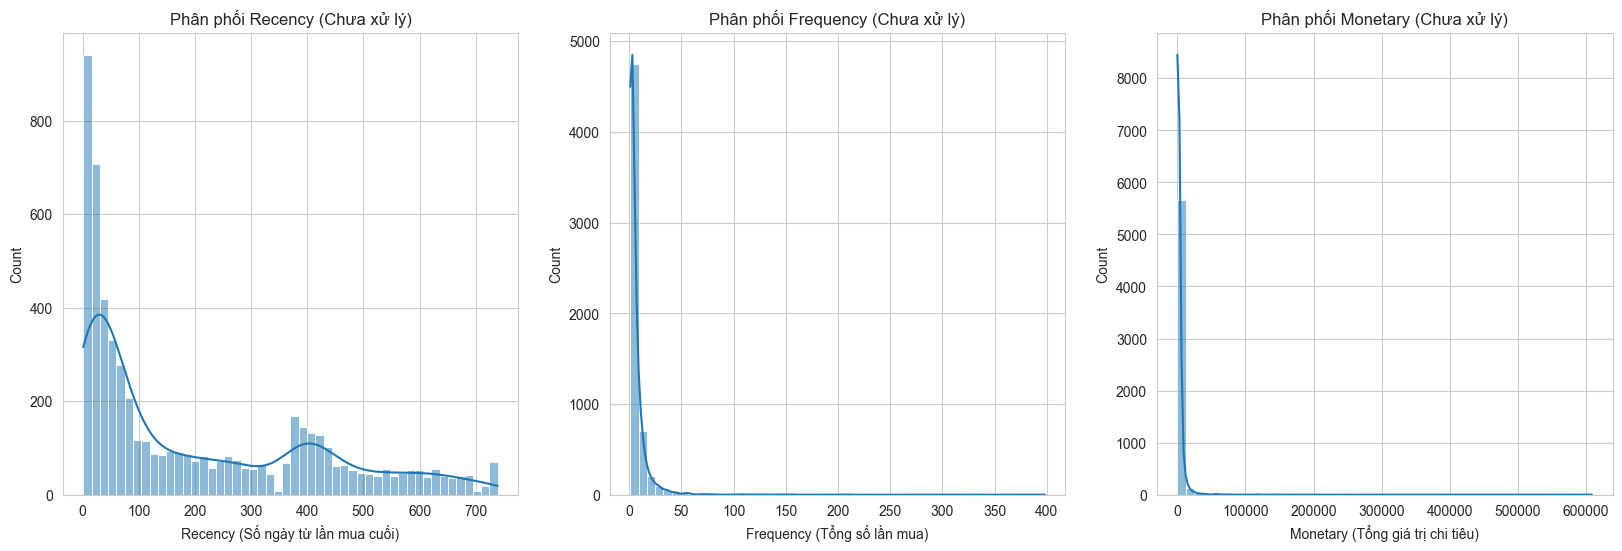

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(rfm_df['Recency (Số ngày từ lần mua cuối)'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Phân phối Recency (Chưa xử lý)')

sns.histplot(rfm_df['Frequency (Tổng số lần mua)'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Phân phối Frequency (Chưa xử lý)')

sns.histplot(rfm_df['Monetary (Tổng giá trị chi tiêu)'], bins=50, kde=True, ax=axes[2])
axes[2].set_title('Phân phối Monetary (Chưa xử lý)')
plt.show()

In [21]:
rfm_log = np.log1p(rfm_df)

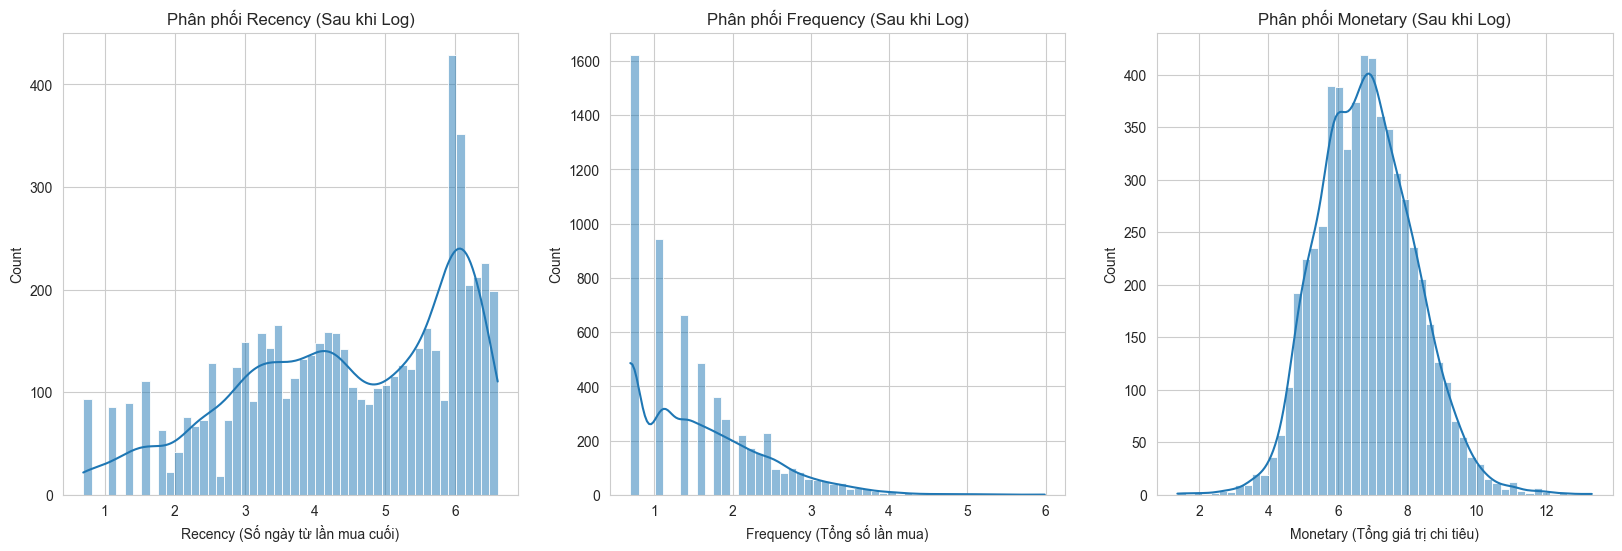

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(rfm_log['Recency (Số ngày từ lần mua cuối)'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Phân phối Recency (Sau khi Log)')

sns.histplot(rfm_log['Frequency (Tổng số lần mua)'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Phân phối Frequency (Sau khi Log)')

sns.histplot(rfm_log['Monetary (Tổng giá trị chi tiêu)'], bins=50, kde=True, ax=axes[2])
axes[2].set_title('Phân phối Monetary (Sau khi Log)')
plt.show()

In [23]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

In [24]:
rfm_scaled_df = pd.DataFrame(data=rfm_scaled, 
                             index=rfm_log.index, 
                             columns=rfm_log.columns)

In [25]:
print(rfm_scaled_df.head())

             Recency (Số ngày từ lần mua cuối)  Frequency (Tổng số lần mua)  \
Customer ID                                                                   
12346                                 0.856701                     1.254496   
12347                                -2.151979                     0.800166   
12348                                -0.079138                     0.299207   
12349                                -0.935308                     0.073946   
12350                                 0.824527                    -1.058146   

             Monetary (Tổng giá trị chi tiêu)  
Customer ID                                    
12346                                3.186625  
12347                                1.297127  
12348                                0.558100  
12349                                1.123790  
12350                               -0.735888  


In [26]:
rfm_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5878 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Recency (Số ngày từ lần mua cuối)  5878 non-null   float64
 1   Frequency (Tổng số lần mua)        5878 non-null   float64
 2   Monetary (Tổng giá trị chi tiêu)   5878 non-null   float64
dtypes: float64(3)
memory usage: 312.7+ KB


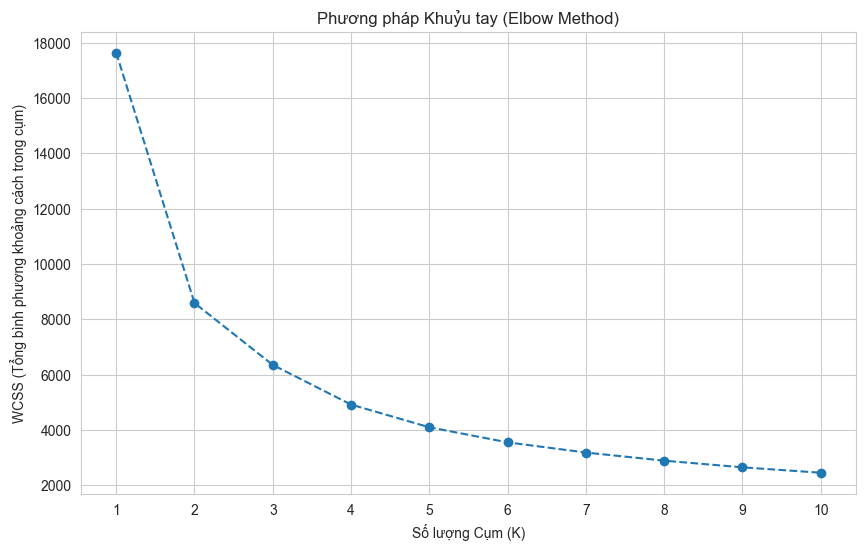

In [27]:
# Chạy K-Means với K từ 1 đến 10 để tìm "khuỷu tay"
wcss = {} # Within-Cluster Sum of Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, 
                    init='k-means++',  # Phương pháp khởi tạo thông minh
                    max_iter=300,      # Số vòng lặp tối đa
                    n_init=10,         # Chạy thuật toán 10 lần với centroid khác nhau
                    random_state=42)   # Để đảm bảo kết quả nhất quán
    
    kmeans.fit(rfm_scaled_df)
    wcss[k] = kmeans.inertia_ # .inertia_ chính là WCSS

# Trực quan hóa Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(list(wcss.keys()), list(wcss.values()), marker='o', linestyle='--')
plt.title('Phương pháp Khuỷu tay (Elbow Method)')
plt.xlabel('Số lượng Cụm (K)')
plt.ylabel('WCSS (Tổng bình phương khoảng cách trong cụm)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [28]:
wcss

{1: 17634.0,
 2: 8588.809588144562,
 3: 6351.979843489704,
 4: 4918.640147513731,
 5: 4097.826757210482,
 6: 3552.9825330873678,
 7: 3184.8414240335674,
 8: 2891.595622528871,
 9: 2650.603735743329,
 10: 2455.9099969279614}

In [29]:
optimal_k = 4

In [30]:
final_kmeans = KMeans(n_clusters=optimal_k,
                      init='k-means++',    # Phương pháp khởi tạo thông minh
                      max_iter=300,        # Số vòng lặp tối đa
                      n_init=10,           # Chạy 10 lần, chọn kết quả tốt nhất
                      random_state=42)

In [31]:
final_kmeans.fit(rfm_scaled_df)

,n_clusters,4
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [32]:
rfm_df['Cluster'] = final_kmeans.labels_

In [33]:
print(rfm_df.head())

             Recency (Số ngày từ lần mua cuối)  Frequency (Tổng số lần mua)  \
Customer ID                                                                   
12346                                      326                           12   
12347                                        2                            8   
12348                                       75                            5   
12349                                       19                            4   
12350                                      310                            1   

             Monetary (Tổng giá trị chi tiêu)  Cluster  
Customer ID                                             
12346                                77556.46        0  
12347                                 5633.32        0  
12348                                 2019.40        2  
12349                                 4428.69        3  
12350                                  334.40        1  


In [34]:
print(rfm_df['Cluster'].value_counts().sort_index())

Cluster
0    1188
1    1974
2    1465
3    1251
Name: count, dtype: int64


In [35]:
cluster_analysis = rfm_df.groupby('Cluster').agg(
    Recency_Mean=('Recency (Số ngày từ lần mua cuối)', 'mean'),
    Frequency_Mean=('Frequency (Tổng số lần mua)', 'mean'),
    Monetary_Mean=('Monetary (Tổng giá trị chi tiêu)', 'mean'),
    Customer_Count=('Recency (Số ngày từ lần mua cuối)', 'count')
)

In [36]:
print(cluster_analysis.sort_values(by='Monetary_Mean', ascending=False))

         Recency_Mean  Frequency_Mean  Monetary_Mean  Customer_Count
Cluster                                                             
0           27.430976       19.341751   11014.368423            1188
2          227.872355        5.098294    2002.102476            1465
3           28.437250        3.036771     865.109874            1251
1          395.862715        1.379433     325.748182            1974


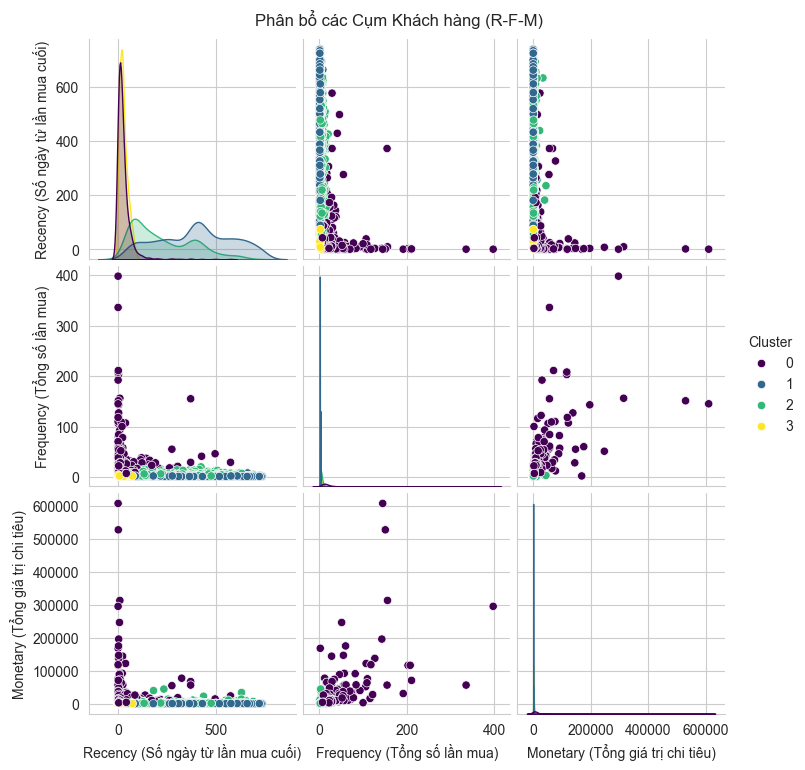

In [37]:
sns.pairplot(rfm_df, 
             vars=['Recency (Số ngày từ lần mua cuối)', 
                   'Frequency (Tổng số lần mua)', 
                   'Monetary (Tổng giá trị chi tiêu)'], 
             hue='Cluster', 
             palette='viridis') # Bạn có thể đổi 'viridis' thành 'coolwarm', 'Set1', v.v.
plt.suptitle('Phân bổ các Cụm Khách hàng (R-F-M)', y=1.02)
plt.show()